In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os

# Load the training image

(1000, 2000, 3)


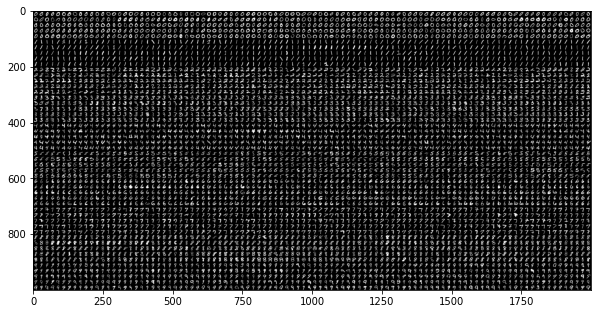

In [2]:
img = cv2.imread("data/digits.png")

print(img.shape)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

(1000, 2000)


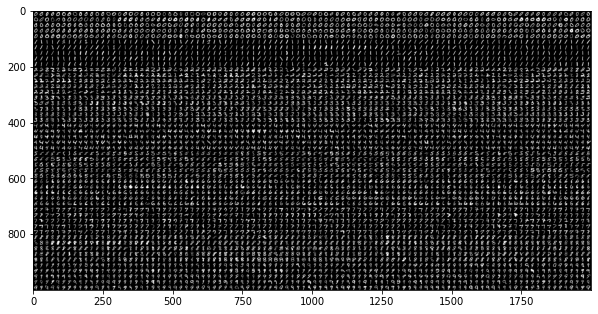

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(gray.shape)

plt.figure(figsize=(10, 10))
plt.imshow(gray, cmap='gray')
plt.show()

# Divide image into cells

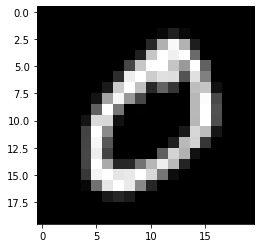

In [4]:
test_img = gray[:20, :20]

plt.imshow(test_img, cmap='gray')

In [5]:
cells = np.array([np.hsplit(row, 100) for row in np.vsplit(gray, 50)])

print(cells.shape)

(50, 100, 20, 20)


# Train/test data 

In [6]:
train = cells[:, :50].reshape(-1, 400).astype(np.float32)
test = cells[:, 50:100].reshape(-1, 400).astype(np.float32)

print(train.shape, test.shape)

(2500, 400) (2500, 400)


In [7]:
# labels
num_labels = np.arange(10)
train_labels = np.repeat(num_labels, 250)[:, np.newaxis]

print(train_labels[:1000:100])

[[0]
 [0]
 [0]
 [1]
 [1]
 [2]
 [2]
 [2]
 [3]
 [3]]


In [8]:
test_labels = train_labels.copy()

# kNN initialization

In [9]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

True

# Accuracy

In [10]:
ret, result, neighbours, dist = knn.findNearest(test,k=5)
matches = result == test_labels

correct = np.count_nonzero(matches)

In [11]:
acc = (correct/result.size) * 100.

print(acc)

91.75999999999999


In [12]:
# save the kNN Model
np.savez('knn_data.npz',train=train, train_labels=train_labels)

# Testing algorithm

In [13]:
with np.load('knn_data.npz') as data:
    print(data.files)
    train = data['train']
    train_labels = data['train_labels']

['train', 'train_labels']


In [14]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels) 

True

(127, 167)


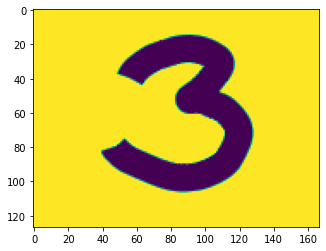

In [15]:
test_img = cv2.imread("data/test.png")
test_img =cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)

print(test_img.shape)

plt.imshow(test_img)
plt.show()

(20, 20)


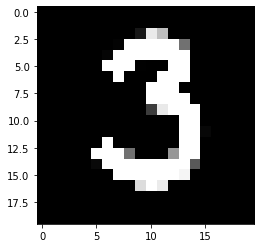

In [16]:
test_img = cv2.resize(test_img, (20, 20)) 
test_img = cv2.bitwise_not(test_img)

print(test_img.shape)

plt.imshow(test_img, cmap='gray')
plt.show()

In [17]:
test_array = np.array(test_img)
test_array = test_array.reshape(-1, 400).astype(np.float32)

In [18]:
ret, result, neighbours, dist = knn.findNearest(test_array, k=2)

result = result.item()
result

3.0